<a href="https://colab.research.google.com/github/damianphung/python_notebooks/blob/main/pytorch_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

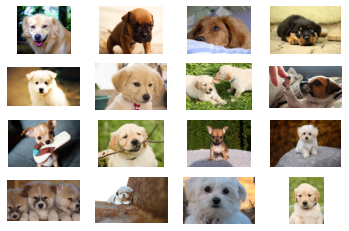

In [3]:
# from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
# from msrest.authentication import CognitiveServicesCredentials as auth
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

subscription_key = "XXXX"
search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"
search_term = "puppies"

headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
params  = {"q": search_term, "license": "public", "imageType": "photo"}

response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()
search_results = response.json()
thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"][:16]]

f, axes = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        image_data = requests.get(thumbnail_urls[i+4*j])
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))        
        axes[i][j].imshow(image)
        axes[i][j].axis("off")
plt.show()

In [4]:
 from pathlib import Path
 import requests

 url_path = Path()
 url_path = url_path / "azure_puppies"
 if not url_path.exists():
     url_path.mkdir(mode=0o777, parents=False, exist_ok=False)
 
 for idx, image in enumerate(search_results["value"]):
    print(image["contentUrl"])
    response = requests.get(image["contentUrl"])
    fileName = str(idx) + '.' + image["contentUrl"][-3:] # last 3 chars
    download_path = url_path / fileName
    with open(download_path, "wb") as file:
        file.write(response.content)

# Verify by using the PIL image library.
def verify_img(image):
    try:
        im = Image.open(image)
        im.draft(im.mode, (32,32))
        im.load()
        return True
    except:
        return False

def verify_imgs(images):
    # See https://medium.com/@robertbracco1/how-to-do-fastai-even-faster-bebf9693c99a
    listify = [ images[i] for i, valid_img in enumerate(parallel(verify_img, images)) if not valid_img ]
    print(listify)
     

https://get.pxhere.com/photo/puppy-dog-animal-cute-canine-fur-golden-fluffy-mammal-smile-friend-pets-dogs-golden-retriever-furry-vertebrate-domestic-adorable-labrador-dog-breed-retriever-doggy-cute-dog-dog-like-mammal-carnivoran-dog-breed-group-tibetan-spaniel-856333.jpg
https://get.pxhere.com/photo/white-sweet-puppy-dog-animal-cute-looking-pet-fur-young-sitting-small-mammal-friend-vertebrate-domestic-adorable-dog-breed-breed-pup-samoyed-cute-puppy-korean-jindo-dog-dog-like-mammal-carnivoran-dog-breed-group-greenland-dog-japanese-spitz-american-eskimo-dog-609173.jpg
https://get.pxhere.com/photo/puppy-dog-animal-cute-canine-pet-young-small-mammal-baby-miniature-close-up-lovely-furry-tiny-little-vertebrate-chihuahua-funny-domestic-adorable-breed-pup-doggy-companion-purebred-dog-like-mammal-carnivoran-714477.jpg
https://get.pxhere.com/photo/puppy-dog-animal-pet-mammal-pets-vertebrate-dog-breed-akita-puppies-shiba-inu-akita-inu-korean-jindo-dog-shikoku-dog-like-mammal-carnivoran-dog-breed-

AttributeError: ignored

In [5]:
url_path
# for puppy in url_path.ls():
#     valid_image = verify_img(puppy)
#     if not valid_image:
#         print(puppy)
#         os.unlink(puppy)   

PosixPath('azure_puppies')

In [6]:
doc??

Object `doc` not found.
